In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog
%matplotlib inline
rcParams["figure.figsize"]=(18,5)
import pandas as pd

[143, 151, 153, 163, 174, 176, 174, 160, 149, 140, 131, 139]


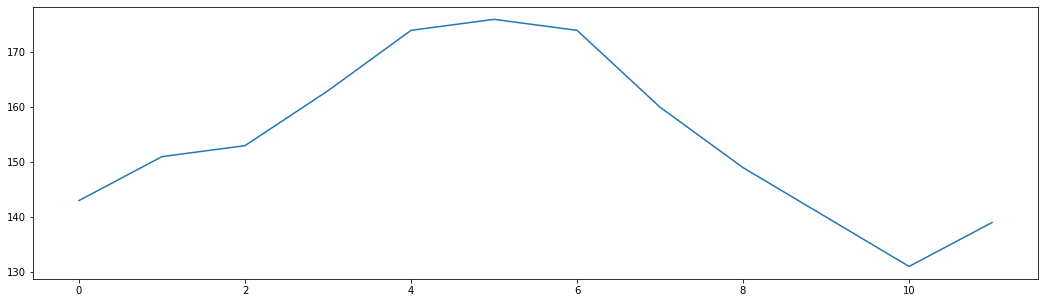

In [2]:
# Planing horizont
h = 12
# Prediction
pred = [284.925455, 300.787920, 304.569078, 325.025955, 346.739301, 351.851113,  346.664893,
        318.233748,  297.248124, 279.210739, 260.813104,  277.700654]
pred = list(map(lambda x: round(x, 2), pred))
pred = list(map(lambda x: int(x/2) + 1, pred))
print(pred)
plt.plot(pred)

In [3]:
duration = [3, 4, 7 ,5]
cost_first = 3300
cost_second = 4 * (900 + 110)
cost_third  = 110*3 + 90*4 + 850*7 + 100
cost_fourth = 950*5 +450
cost = [cost_first, cost_second, cost_third, cost_fourth]
print(cost)

[3300, 4040, 6740, 5200]


In [4]:
# Objective function
vec_min = np.array([i for i in cost for _ in range(h)])
vec_min

array([3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300,
       3300, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040,
       4040, 4040, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740,
       6740, 6740, 6740, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 5200])

In [5]:
A_full = np.empty((h, h * len(duration)), dtype=np.int64)
for n, m in enumerate(duration):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]

In [6]:
pd.DataFrame(A_con)
print(A_con)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  1 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
  1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
  1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
  0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0
  0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
  0 0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0
  0 0 0 0 0 1 1 1

In [7]:
#### Optimizer
print(pred)
c = vec_min
b = -np.array(pred)
A =  -A_con

res = linprog(c, A, b)
print(res)

[143, 151, 153, 163, 174, 176, 174, 160, 149, 140, 131, 139]
     con: array([], dtype=float64)
     fun: 1850119.998872187
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([-9.59681188e-08, -9.88531497e-08, -9.46880618e-08, -1.02534386e-07,
       -1.08817915e-07, -1.08894085e-07, -1.07131171e-07, -9.76221486e-08,
       -8.99965471e-08, -8.40080077e-08,  7.99999992e+00, -8.33865670e-08])
  status: 0
 success: True
       x: array([2.15031958e-09, 3.73312314e-10, 4.09091743e-09, 2.00000000e+00,
       1.98514214e-09, 9.88629446e-10, 2.91653365e-09, 5.04564656e-10,
       1.79063164e-10, 5.75604865e-10, 5.11014180e-10, 4.38093356e-10,
       3.52504193e-09, 1.77094000e+00, 3.80266863e-09, 1.55931027e+00,
       4.00000000e+00, 6.47377659e-09, 7.50310682e-10, 3.13427485e-10,
       4.66974973e+00, 3.86401658e-10, 2.63773025e-10, 2.89784971e-10,
       7.88194084e+01, 6.22905999e+00, 2.00000000e+00, 9.99999999e-01,
       6.34260710e-10, 6.79515315e+01, 8.514

In [8]:
res.x = list(map(lambda x: round(x, 0) , res.x))
print(res.x)
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(duration), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose()
print(plan)
print(result)

[0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 79.0, 6.0, 2.0, 1.0, 0.0, 68.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 64.0, 0.0, 0.0, 5.0, 7.0, 0.0, 0.0, 66.0, 0.0, 0.0, 0.0, 0.0]
[[ 0.  0. 79. 64.]
 [ 0.  2.  6.  0.]
 [ 0.  0.  2.  0.]
 [ 2.  2.  1.  5.]
 [ 0.  4.  0.  7.]
 [ 0.  0. 68.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. 66.]
 [ 0.  5.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[143.]
 [151.]
 [153.]
 [163.]
 [174.]
 [176.]
 [174.]
 [159.]
 [149.]
 [140.]
 [139.]
 [139.]]


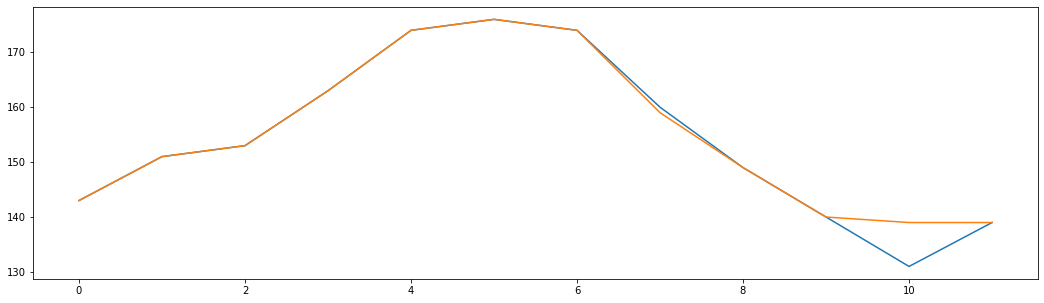

In [9]:
plt.plot(pred)
plt.plot(result)